In [122]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [123]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [38]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [39]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [42]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date = '2016-08-23'
end_date = '2017-08-23'

temp = [ct for ct in calc_temps(start_date, end_date)[0]]
temp

[58.0, 74.59058295964125, 87.0]

<ErrorbarContainer object of 3 artists>

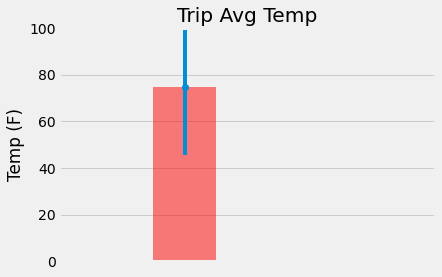

In [105]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
plt.bar(1, temp[1], color='r', width = 0.2, alpha=0.5, align="center")
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xlim(0.6,1.8)
plt.ylim(0,100)
ax.axes.xaxis.set_visible(False)
ax.errorbar(1, temps[1], temps[2] - temps[0], fmt="o")

### Daily Rainfall Average

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [145]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [146]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# # Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates

df=pd.date_range(start_date,end_date)
df

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')

In [180]:
# Strip off the year and save a list of strings in the format %m-%d
newdf=df.strftime('%m-%d')
newdf

Index(['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07'], dtype='object')

In [181]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
Daily_Normals = [daily_normals(date) for date in newdf]
Daily_Normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)],
 [(71.0, 77.15686274509804, 83.0)]]

In [178]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
recentdf =pd.DataFrame(Daily_Normals)
recentdf

,0
0,"(67.0, 75.54, 83.0)"
1,"(68.0, 75.60377358490567, 84.0)"
2,"(70.0, 76.61111111111111, 85.0)"
3,"(69.0, 76.71153846153847, 84.0)"
4,"(69.0, 76.14814814814815, 82.0)"
5,"(67.0, 76.25, 83.0)"
6,"(71.0, 77.15686274509804, 83.0)"


In [188]:
# recentdf = pd.DataFrame(np.array(Daily_Normals),index=[['gibberish']*2, [0, 1]],
#                   columns=['MIN', 'AVG', 'MAX'])

## Close Session

In [49]:
session.close()